In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

2024-01-09 03:05:34.463980: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## The Data

In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable.

In [2]:
df = pd.read_csv("DATA/UK_foods.csv", index_col='Unnamed: 0')
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [3]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [4]:
df.transpose().info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, England to N.Ireland
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Cheese               4 non-null      int64
 1   Carcass_meat         4 non-null      int64
 2   Other_meat           4 non-null      int64
 3   Fish                 4 non-null      int64
 4   Fats_and_oils        4 non-null      int64
 5   Sugars               4 non-null      int64
 6   Fresh_potatoes       4 non-null      int64
 7   Fresh_Veg            4 non-null      int64
 8   Other_Veg            4 non-null      int64
 9   Processed_potatoes   4 non-null      int64
 10  Processed_Veg        4 non-null      int64
 11  Fresh_fruit          4 non-null      int64
 12  Cereals              4 non-null      int64
 13  Beverages            4 non-null      int64
 14  Soft_drinks          4 non-null      int64
 15  Alcoholic_drinks     4 non-null      int64
 16  Confectionery        

In [5]:
df.transpose().describe()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
count,4.000000,4.00,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,94.250000,245.25,706.000000,130.500000,205.250000,154.25000,798.250000,208.000000,457.750000,202.000000,349.000000,967.500000,1502.500000,57.500000,1427.000000,360.750000,55.250000
std,18.856917,16.50,93.427334,29.557853,22.366269,15.47848,200.755863,60.188592,92.471167,13.735599,15.769168,210.612599,54.659552,11.120552,140.612944,156.712848,10.436315
min,66.000000,227.00,586.000000,93.000000,184.000000,139.00000,566.000000,143.000000,355.000000,187.000000,334.000000,674.000000,1462.000000,47.000000,1256.000000,135.000000,41.000000
25%,93.750000,238.25,660.250000,114.750000,190.750000,145.00000,681.500000,164.000000,402.250000,195.250000,336.250000,886.250000,1469.500000,51.500000,1344.500000,315.000000,50.750000
50%,103.000000,243.50,717.500000,134.500000,201.000000,151.50000,797.000000,212.000000,453.000000,200.500000,348.500000,1029.500000,1483.000000,55.000000,1440.000000,416.500000,58.000000
75%,103.500000,250.50,763.250000,150.250000,215.500000,160.75000,913.750000,256.000000,508.500000,207.250000,361.250000,1110.750000,1516.000000,61.000000,1522.500000,462.250000,62.500000
max,105.000000,267.00,803.000000,160.000000,235.000000,175.00000,1033.000000,265.000000,570.000000,220.000000,365.000000,1137.000000,1582.000000,73.000000,1572.000000,475.000000,64.000000


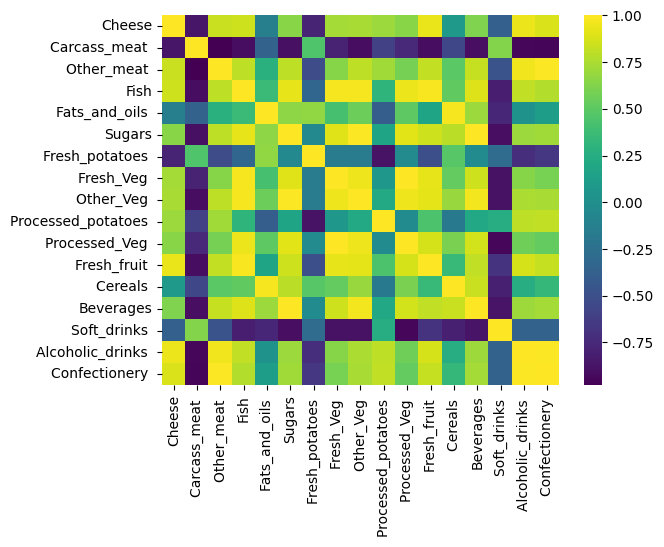

In [6]:
_ = sns.heatmap(df.transpose().corr(), cmap='viridis')

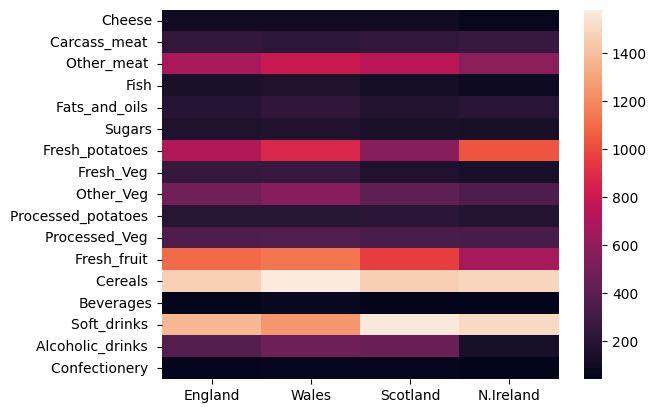

In [7]:
_ = sns.heatmap(df)

In [8]:
df.transpose().shape

(4, 17)

Run the imports necessary to build an autoencoder. Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [10]:
encoder = Sequential()

encoder.add(Dense(units=8, activation='relu', input_shape=[17]))
encoder.add(Dense(units=4, activation='relu', input_shape=[8]))
encoder.add(Dense(units=2, activation='relu', input_shape=[4]))

In [11]:
decoder = Sequential()

decoder.add(Dense(units=4, activation='relu', input_shape=[2]))
decoder.add(Dense(units=8, activation='relu', input_shape=[4]))
decoder.add(Dense(units=17, activation='relu', input_shape=[8]))

Combine the encoder and decoder to be an autoencoder and compile the model.

In [12]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(optimizer=SGD(learning_rate=1.), loss="mse")

Scale the data:

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(df.transpose().to_numpy())

In [15]:
X_train.shape

(4, 17)

In [16]:
autoencoder.fit(
    X_train,
    X_train,
    epochs=50
)

Epoch 1/50
1/1 [==============================] - 1s 579ms/step - loss: 0.4168
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 0.3843
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3636
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3508
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3408
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.3321
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3264
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.3176
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 0.3082
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2932
Epoch 11/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2813
Epoch 12/50
1/1 [==============================] - 0s 7ms/step - loss: 0.2753
Epoch 13/50
1/1 [==============================] - 0s 8ms/step - loss

In [17]:
encoder_predictions = encoder.predict(X_train)

1/1 [==============================] - 0s 83ms/step


In [18]:
encoder_predictions

array([[0.        , 1.1325779 ],
       [0.        , 1.432728  ],
       [0.        , 0.9055235 ],
       [0.09349936, 0.        ]], dtype=float32)

In [19]:
encoder_predictions = pd.DataFrame(encoder_predictions, columns=["C1", "C2"])
encoder_predictions

,C1,C2
0,0.000000,1.132578
1,0.000000,1.432728
2,0.000000,0.905523
3,0.093499,0.000000


In [20]:
results = pd.DataFrame(df.transpose().index, columns=["index"])
results

,index
0,England
1,Wales
2,Scotland
3,N.Ireland


In [21]:
results = pd.concat([results, encoder_predictions], axis=1)
results

,index,C1,C2
0,England,0.000000,1.132578
1,Wales,0.000000,1.432728
2,Scotland,0.000000,0.905523
3,N.Ireland,0.093499,0.000000


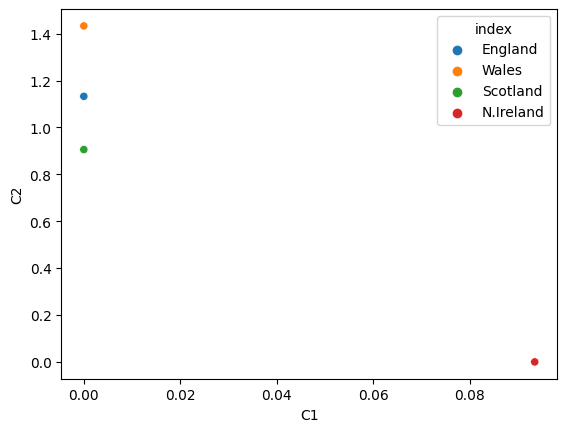

In [22]:
_ = sns.scatterplot(x='C1',y='C2',data=results,hue='index')

Once we go back and look at the data in the table, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. It's a good sign that structure we've visualized reflects a big fact of real-world geography: Northern Ireland is the only of the four countries not on the island of Great Britain.